importing libraries and locating data table PATH

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dash
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import missingno as msno
!cd ../../
!pwd

# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)


/Users/stephen/Flatiron/Phase2/Project2/notebooks/Stephen


In [3]:
# importing data
df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/kc_house_data.csv', index_col=None)

In [4]:
# looking at data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [5]:
df.shape

(21597, 21)

creating new dataframe with only my responsible columns

In [6]:
my_df = df[['price', 'date', 'yr_renovated', 'yr_built', 'condition', 'grade', 'view', 'waterfront', 'zipcode', 'lat', 'long']]

my_df.info

<bound method DataFrame.info of           price        date  yr_renovated  yr_built  condition          grade  \
0     221900.00  10/13/2014          0.00      1955    Average      7 Average   
1     538000.00   12/9/2014       1991.00      1951    Average      7 Average   
2     180000.00   2/25/2015           nan      1933    Average  6 Low Average   
3     604000.00   12/9/2014          0.00      1965  Very Good      7 Average   
4     510000.00   2/18/2015          0.00      1987    Average         8 Good   
...         ...         ...           ...       ...        ...            ...   
21592 360000.00   5/21/2014          0.00      2009    Average         8 Good   
21593 400000.00   2/23/2015          0.00      2014    Average         8 Good   
21594 402101.00   6/23/2014          0.00      2009    Average      7 Average   
21595 400000.00   1/16/2015          0.00      2004    Average         8 Good   
21596 325000.00  10/15/2014          0.00      2008    Average      7 Average

In [7]:
#my_df.info()


Checking Null values

In [8]:
my_df.isna().sum()

price              0
date               0
yr_renovated    3842
yr_built           0
condition          0
grade              0
view              63
waterfront      2376
zipcode            0
lat                0
long               0
dtype: int64

In [9]:
my_df['cat_waterfront'] = my_df['waterfront'].astype('category')
my_df['waterfront'].value_counts(dropna=False)

<ipython-input-9-7236705cbde1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['cat_waterfront'] = my_df['waterfront'].astype('category')


NO     19075
NaN     2376
YES      146
Name: waterfront, dtype: int64

In [10]:
my_df['cat_view'] = my_df['view'].astype('category')

<ipython-input-10-4d128ae12ec2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['cat_view'] = my_df['view'].astype('category')


In [11]:
my_df['view'].value_counts(dropna=False).sort_values()


NaN             63
EXCELLENT      317
FAIR           330
GOOD           508
AVERAGE        957
NONE         19422
Name: view, dtype: int64

In [12]:
my_df['view'].replace({ 'NONE': np.nan, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}, inplace=True)
my_df['view'].value_counts()

/Users/stephen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


3.00    957
4.00    508
2.00    330
5.00    317
Name: view, dtype: int64

replacing Null values withb 'N/A'

In [13]:
my_df['waterfront'].fillna('N/A',inplace=True )

/Users/stephen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
my_df['waterfront'].value_counts(dropna=False)


NO     19075
N/A     2376
YES      146
Name: waterfront, dtype: int64

In [15]:
my_df['view'].value_counts(dropna=False)

nan     19485
3.00      957
4.00      508
2.00      330
5.00      317
Name: view, dtype: int64

In [16]:
my_df['view'].fillna('NONE',inplace=True )

In [17]:
my_df['view'].value_counts(dropna=False)

NONE    19485
3.0       957
4.0       508
2.0       330
5.0       317
Name: view, dtype: int64

In [18]:
my_df['view'].astype('category')

0        NONE
1        NONE
2        NONE
3        NONE
4        NONE
         ... 
21592    NONE
21593    NONE
21594    NONE
21595    NONE
21596    NONE
Name: view, Length: 21597, dtype: category
Categories (5, object): [2.00, 3.00, 4.00, 5.00, 'NONE']

Year Renovated

In [19]:
my_df['yr_renovated'].value_counts(dropna=False)


0.00       17011
nan         3842
2014.00       73
2003.00       31
2013.00       31
           ...  
1944.00        1
1948.00        1
1976.00        1
1934.00        1
1953.00        1
Name: yr_renovated, Length: 71, dtype: int64

In [20]:
my_df['yr_renovated'].replace(to_replace=0.0, value = np.nan, inplace=True)


In [21]:
my_df['yr_renovated'].value_counts(dropna=False)

nan        20853
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64

In [22]:
# making new column for 'condition' to remain category object
my_df['cat_condition'] = my_df['condition'].astype('category')

<ipython-input-22-cb01f8b5f97d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['cat_condition'] = my_df['condition'].astype('category')


In [23]:
# converting catogorical data to numeric 

my_df['condition'].replace({ 'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}, inplace=True)
my_df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [24]:
# new column for 'grade' as catogory
my_df['cat_grade'] = my_df['grade'].astype('category')

<ipython-input-24-b59b03b57738>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['cat_grade'] = my_df['grade'].astype('category')


In [25]:
my_df['grade'].value_counts(dropna=False)

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [26]:
# extracting just numerical value for grade rating
my_df['grade'] = my_df['grade'].str.split(' ').str[0].astype(int)
my_df['grade'] = my_df['grade'].astype('category').cat.codes

<ipython-input-26-552ec29f1685>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['grade'] = my_df['grade'].str.split(' ').str[0].astype(int)
<ipython-input-26-552ec29f1685>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['grade'] = my_df['grade'].astype('category').cat.codes


Plotting to see what the data looks like 


In [27]:
my_df['grade'].value_counts(dropna=False)

4     8974
5     6065
6     2615
3     2038
7     1134
8      399
2      242
9       89
1       27
10      13
0        1
Name: grade, dtype: int64

In [28]:
my_df['cat_zipcode'] = my_df['zipcode'].astype('category')

<ipython-input-28-2d7d0d6071db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['cat_zipcode'] = my_df['zipcode'].astype('category')


In [29]:
my_df['condition']

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21597, dtype: int64

In [30]:
my_df.describe()

,price,yr_renovated,yr_built,condition,grade,zipcode,lat,long
count,21597.00,744.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,1995.93,1971.00,3.41,4.66,98077.95,47.56,-122.21
std,367368.14,15.60,29.38,0.65,1.17,53.51,0.14,0.14
min,78000.00,1934.00,1900.00,1.00,0.00,98001.00,47.16,-122.52
25%,322000.00,1987.00,1951.00,3.00,4.00,98033.00,47.47,-122.33
50%,450000.00,2000.00,1975.00,3.00,4.00,98065.00,47.57,-122.23
75%,645000.00,2007.25,1997.00,4.00,5.00,98118.00,47.68,-122.12
max,7700000.00,2015.00,2015.00,5.00,10.00,98199.00,47.78,-121.31


In [31]:
pd.to_datetime(my_df['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [32]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           21597 non-null  float64 
 1   date            21597 non-null  object  
 2   yr_renovated    744 non-null    float64 
 3   yr_built        21597 non-null  int64   
 4   condition       21597 non-null  int64   
 5   grade           21597 non-null  int8    
 6   view            21597 non-null  object  
 7   waterfront      21597 non-null  object  
 8   zipcode         21597 non-null  int64   
 9   lat             21597 non-null  float64 
 10  long            21597 non-null  float64 
 11  cat_waterfront  19221 non-null  category
 12  cat_view        21534 non-null  category
 13  cat_condition   21597 non-null  category
 14  cat_grade       21597 non-null  category
 15  cat_zipcode     21597 non-null  category
dtypes: category(5), float64(4), int64(3), int8(1), object(3)
m

In [33]:
my_df.head()

,price,date,yr_renovated,yr_built,condition,grade,view,waterfront,zipcode,lat,long,cat_waterfront,cat_view,cat_condition,cat_grade,cat_zipcode
0,221900.00,10/13/2014,nan,1955,3,4,NONE,N/A,98178,47.51,-122.26,NaN,NONE,Average,7 Average,98178
1,538000.00,12/9/2014,1991.00,1951,3,4,NONE,NO,98125,47.72,-122.32,NO,NONE,Average,7 Average,98125
2,180000.00,2/25/2015,nan,1933,3,3,NONE,NO,98028,47.74,-122.23,NO,NONE,Average,6 Low Average,98028
3,604000.00,12/9/2014,nan,1965,5,4,NONE,NO,98136,47.52,-122.39,NO,NONE,Very Good,7 Average,98136
4,510000.00,2/18/2015,nan,1987,3,5,NONE,NO,98074,47.62,-122.05,NO,NONE,Average,8 Good,98074


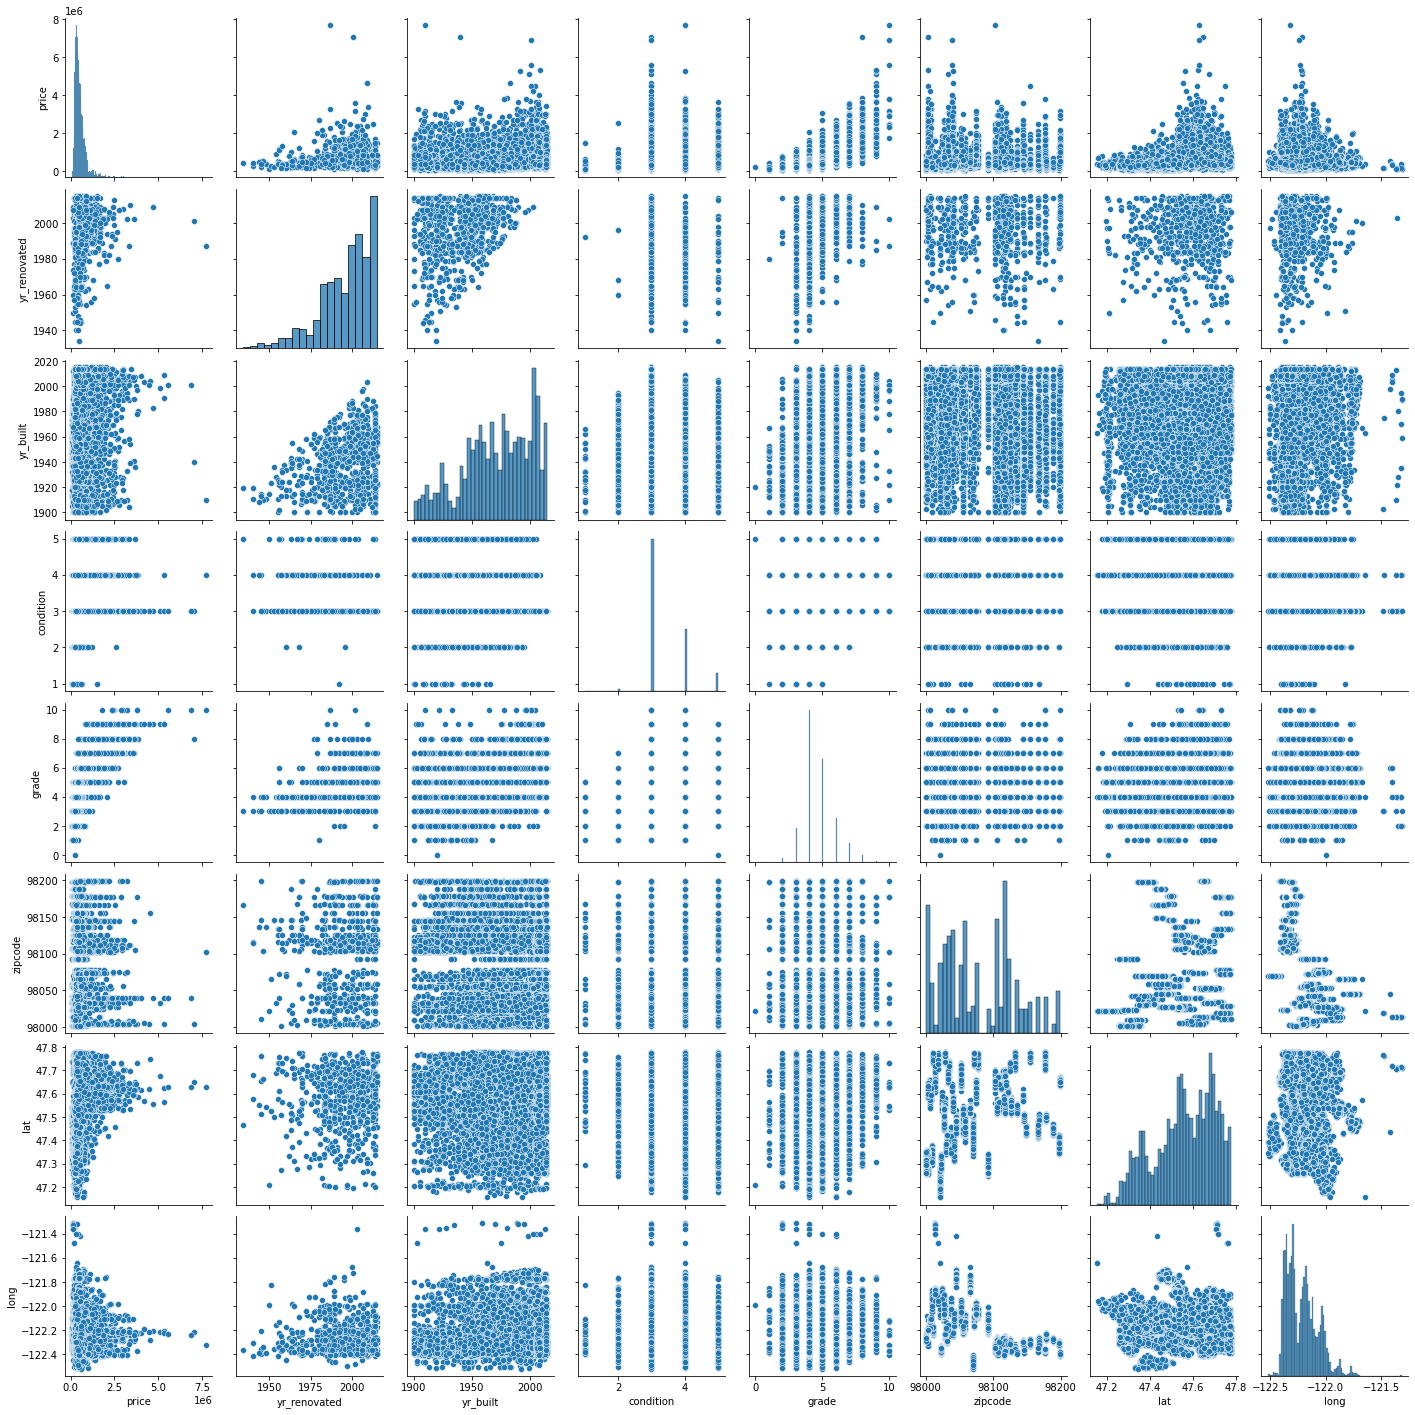

In [34]:
sns.pairplot(my_df)

/Users/stephen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

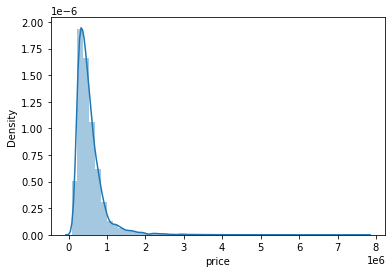

In [35]:
sns.distplot(a=my_df['price'], hist=True, kde=True, rug=False)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

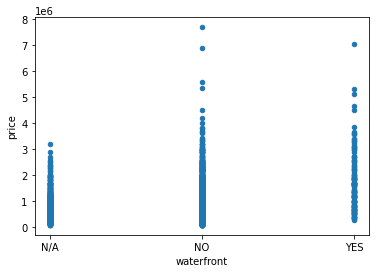

In [36]:
my_df.plot(kind='scatter', x='waterfront', y='price')

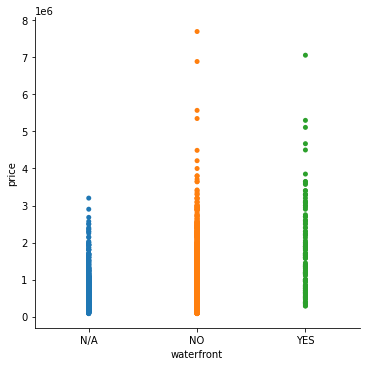

In [37]:
sns.catplot(x='waterfront',y='price',jitter = False, data=my_df)

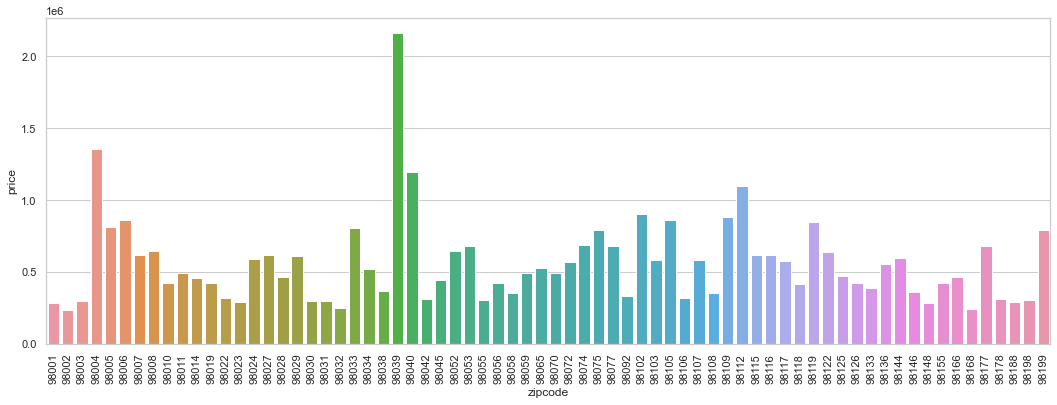

In [38]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(x='zipcode',y='price', ci = False, data=df)
plt.xticks(rotation=90);

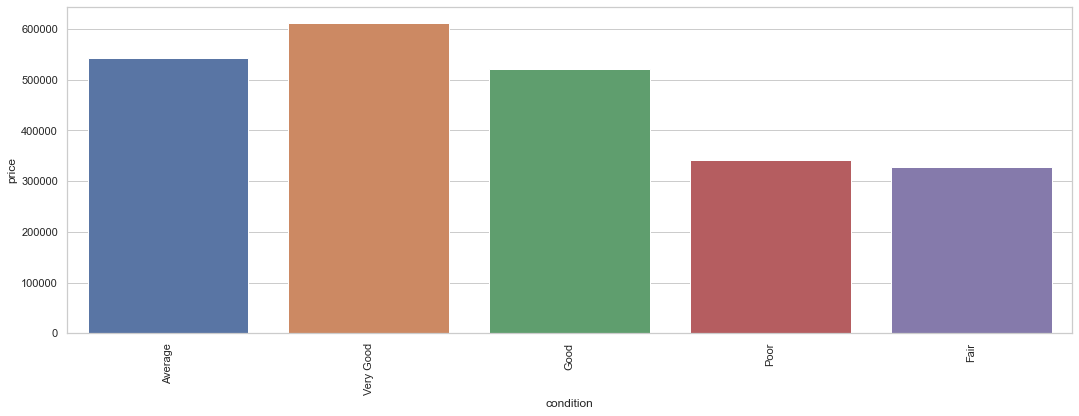

In [39]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(x='condition',y='price', ci = False, data=df)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='cat_condition', ylabel='zipcode'>

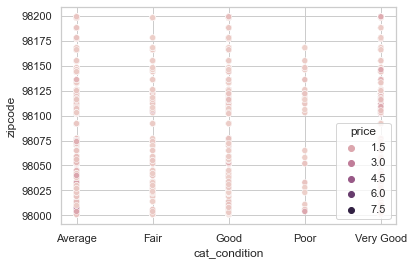

In [40]:
sns.scatterplot(x='cat_condition',y='zipcode', hue='price', data=my_df)

plotting on a geomap


In [41]:
BBox = (df.long.min(), df.long.max(), df.lat.min(), df.lat.max())
        
print(BBox)

(-122.519, -121.315, 47.1559, 47.7776)


In [42]:
king_county_map = plt.imread('/Users/stephen/Flatiron/Phase2/Project2/visuals/king_county_map.png')

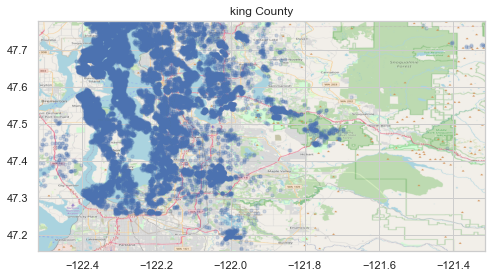

In [43]:
fig , ax = plt.subplots(figsize = (8,7))

ax.scatter(df.long, df.lat, zorder=1, alpha= 0.2, c='b', s=10)

ax.set_title('king County')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(king_county_map, zorder=0, extent = BBox, aspect= 'equal')

In [44]:
filt_df = my_df.loc[df['price'] < 1000000]

In [45]:
fig = px.scatter_mapbox(filt_df,
                        lat='lat',
                        lon='long',
                        color='price',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

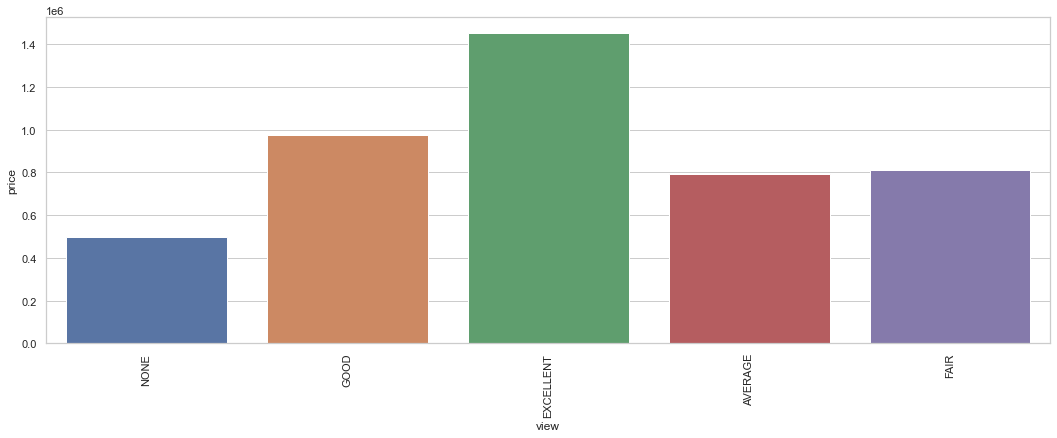

In [46]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(x='view',y='price', ci = False, data=df)
plt.xticks(rotation=90);

In [47]:
# showing different view 

#fig = px.scatter_mapbox(c_df,
                        #lat='lat',
                        #lon='long',
                        #color='view',
                        #zoom=8)
#fig.update_layout(mapbox_style='open-street-map')

#fig.show()

In [48]:
# showing different view 

#fig = px.scatter_mapbox(my_df,
                        #lat='lat',
                        #lon='long',
                        #color='waterfront',
                        #zoom=8)
#fig.update_layout(mapbox_style='open-street-map')

#fig.show()

In [49]:
#check = q_df.groupby('zipcode')['price'].max().head()
my_df['price']





0       221900.00
1       538000.00
2       180000.00
3       604000.00
4       510000.00
           ...   
21592   360000.00
21593   400000.00
21594   402101.00
21595   400000.00
21596   325000.00
Name: price, Length: 21597, dtype: float64

LOOKING AT CORRELATION



<AxesSubplot:>

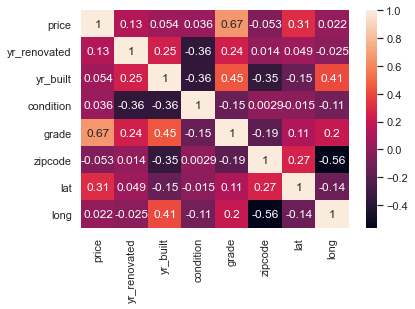

In [50]:
sns.heatmap(my_df.corr(),annot=True)


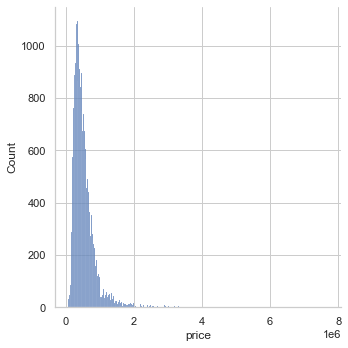

In [51]:
# look at spread of target varriable (price)
sns.displot(my_df.price)


<AxesSubplot:ylabel='price'>

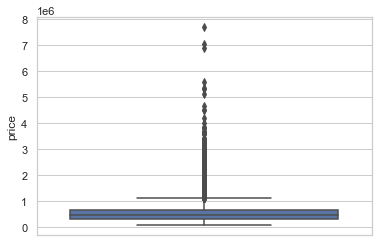

In [52]:
sns.boxplot(y=my_df.price)

In [53]:
# remove outliners from price
Q1 = my_df['price'].quantile(0.05)
Q3 = my_df['price'].quantile(0.80)
IQR = Q3 - Q1

filtered_df = my_df[my_df['price'] > Q1]
filtered_df = my_df[my_df['price'] < Q3]

In [54]:
filtered_df

,price,date,yr_renovated,yr_built,condition,grade,view,waterfront,zipcode,lat,long,cat_waterfront,cat_view,cat_condition,cat_grade,cat_zipcode
0,221900.00,10/13/2014,nan,1955,3,4,NONE,N/A,98178,47.51,-122.26,NaN,NONE,Average,7 Average,98178
1,538000.00,12/9/2014,1991.00,1951,3,4,NONE,NO,98125,47.72,-122.32,NO,NONE,Average,7 Average,98125
2,180000.00,2/25/2015,nan,1933,3,3,NONE,NO,98028,47.74,-122.23,NO,NONE,Average,6 Low Average,98028
3,604000.00,12/9/2014,nan,1965,5,4,NONE,NO,98136,47.52,-122.39,NO,NONE,Very Good,7 Average,98136
4,510000.00,2/18/2015,nan,1987,3,5,NONE,NO,98074,47.62,-122.05,NO,NONE,Average,8 Good,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,5/21/2014,nan,2009,3,5,NONE,NO,98103,47.70,-122.35,NO,NONE,Average,8 Good,98103
21593,400000.00,2/23/2015,nan,2014,3,5,NONE,NO,98146,47.51,-122.36,NO,NONE,Average,8 Good,98146
21594,402101.00,6/23/2014,nan,2009,3,4,NONE,NO,98144,47.59,-122.30,NO,NONE,Average,7 Average,98144
21595,400000.00,1/16/2015,nan,2004,3,5,NONE,N/A,98027,47.53,-122.07,NaN,NONE,Average,8 Good,98027


In [55]:
# exporting clean dataframes as new csv'set
my_df.to_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_dataframe')
filtered_df.to_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_filtered_dataframe')




In [58]:
filtered_df

,price,date,yr_renovated,yr_built,condition,grade,view,waterfront,zipcode,lat,long,cat_waterfront,cat_view,cat_condition,cat_grade,cat_zipcode
0,221900.00,10/13/2014,nan,1955,3,4,NONE,N/A,98178,47.51,-122.26,NaN,NONE,Average,7 Average,98178
1,538000.00,12/9/2014,1991.00,1951,3,4,NONE,NO,98125,47.72,-122.32,NO,NONE,Average,7 Average,98125
2,180000.00,2/25/2015,nan,1933,3,3,NONE,NO,98028,47.74,-122.23,NO,NONE,Average,6 Low Average,98028
3,604000.00,12/9/2014,nan,1965,5,4,NONE,NO,98136,47.52,-122.39,NO,NONE,Very Good,7 Average,98136
4,510000.00,2/18/2015,nan,1987,3,5,NONE,NO,98074,47.62,-122.05,NO,NONE,Average,8 Good,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,5/21/2014,nan,2009,3,5,NONE,NO,98103,47.70,-122.35,NO,NONE,Average,8 Good,98103
21593,400000.00,2/23/2015,nan,2014,3,5,NONE,NO,98146,47.51,-122.36,NO,NONE,Average,8 Good,98146
21594,402101.00,6/23/2014,nan,2009,3,4,NONE,NO,98144,47.59,-122.30,NO,NONE,Average,7 Average,98144
21595,400000.00,1/16/2015,nan,2004,3,5,NONE,N/A,98027,47.53,-122.07,NaN,NONE,Average,8 Good,98027


Prepare data for regression